<a href="https://colab.research.google.com/github/LakshmikanthGopi/Chennai-house-price-prediction/blob/main/Chennai_houseprice_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as st
import statistics as s

import plotly.express as px

import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/train-chennai-sale.csv')
df.head(10)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
5,P00219,Chrompet,1220,11-09-2014,36,2.0,1.0,4,Partial,No,12-09-2009,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,409027,198316,12394750
6,P09105,Chrompet,1167,05-04-2007,137,1.0,1.0,3,Partial,No,12-04-1979,Other,AllPub,No Access,RL,3.6,2.1,2.5,2.670,263152,33955,8488790
7,P09679,Velachery,1847,13-03-2006,176,3.0,2.0,5,Family,No,15-03-1996,Commercial,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,604809,235204,16800250
8,P03377,Chrompet,771,06-04-2011,175,1.0,1.0,2,AdjLand,No,14-04-1977,Others,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,257578,33236,8308970
9,P09623,Velachery,1635,22-06-2006,74,2.0,1.0,4,AbNormal,No,26-06-1991,Others,ELO,No Access,I,3.1,3.1,3.3,3.160,323346,121255,8083650


# **Data Cleaning**

In [ ]:
df.shape

(7109, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [ ]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [ ]:
df.shape

(7056, 22)

In [ ]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [ ]:
df["N_BEDROOM"]=df["N_BEDROOM"].astype('int')
df['N_BATHROOM']=df['N_BATHROOM'].astype('int')

In [ ]:
df["DATE_SALE"] = pd.to_datetime(df["DATE_SALE"])
df['DATE_BUILD']=pd.to_datetime(df["DATE_BUILD"])

In [ ]:
df['YEAR_SOLD']=df['DATE_SALE'].dt.year
df['YEAR_BUILD']=df['DATE_BUILD'].dt.year
df.head(5)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,YEAR_SOLD,YEAR_BUILD
0,P03210,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,2011,1967
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,2006,1995
2,P01812,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,2012,1992
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,2010,1988
4,P06210,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,2009,1979


In [ ]:
df["AGE_OF_HOUSE"]=df['YEAR_SOLD'] - df['YEAR_BUILD']


pd.set_option('display.max_columns', None)
df.head(5)


,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,YEAR_SOLD,YEAR_BUILD,AGE_OF_HOUSE
0,P03210,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,2011,1967,44
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,2006,1995,11
2,P01812,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,2012,1992,20
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,2010,1988,22
4,P06210,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,2009,1979,30


In [ ]:
df = df.replace(to_replace=['Anna Nagar','Ann Nagar','Ana Nagar'],value='Anna Nagar')
df = df.replace(to_replace=['Adyr','Adyar'],value='Adyar')
df = df.replace(to_replace=['Karapakkam','Karapakam'],value='Karapakkam')
df = df.replace(to_replace=['Velachery','Velchery'],value='Velachery')
df = df.replace(to_replace=['TNagar','T Nagar'],value='T-Nagar')
df = df.replace(to_replace=['Chrompt','Chrmpet','Chormpet'],value='Chrompet')
df = df.replace(to_replace=['KKNagar','KK Nagar'],value='KK-Nagar')

In [ ]:
df['AREA'].value_counts()

Chrompet      1691
Karapakkam    1359
KK-Nagar       990
Velachery      975
Anna Nagar     777
Adyar          769
T-Nagar        495
Name: AREA, dtype: int64

In [ ]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK-Nagar', 'T-Nagar'], dtype=object)

In [ ]:
df = df.replace(to_replace=['AbNormal','Ab Normal'],value='Abnormal')

df = df.replace(to_replace=['Partial','Partiall','PartiaLl'],value='partial')

df = df.replace(to_replace=['Adj Land','AdjLand'],value='Adj Land')

In [ ]:
df['SALE_COND'].unique()

array(['Abnormal', 'Family', 'partial', 'Adj Land', 'Normal Sale'],
      dtype=object)

In [ ]:

df=df.replace(to_replace=['Others','Other'],value='Others')
df= df.replace(to_replace=['Comercial'],value='Commercial')


In [ ]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [ ]:
df = df.replace(to_replace=['NoSeWa','NoSewr','NoSewr','NoSewr '],value='No Sewage')
df = df.replace(to_replace=['AllPub','All Pub'],value='All Pub')

In [ ]:
df['UTILITY_AVAIL'].unique()

array(['All Pub', 'ELO', 'No Sewage'], dtype=object)

In [ ]:
df = df.replace(to_replace=['Pavd'],value='Paved')
df = df.replace(to_replace=['NoAccess'],value='No Access')

In [ ]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [ ]:
df=df.replace(to_replace='Noo',value="No")
df['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

# **EDA**

Text(0.5, 1.0, 'Number of Houses in Area')

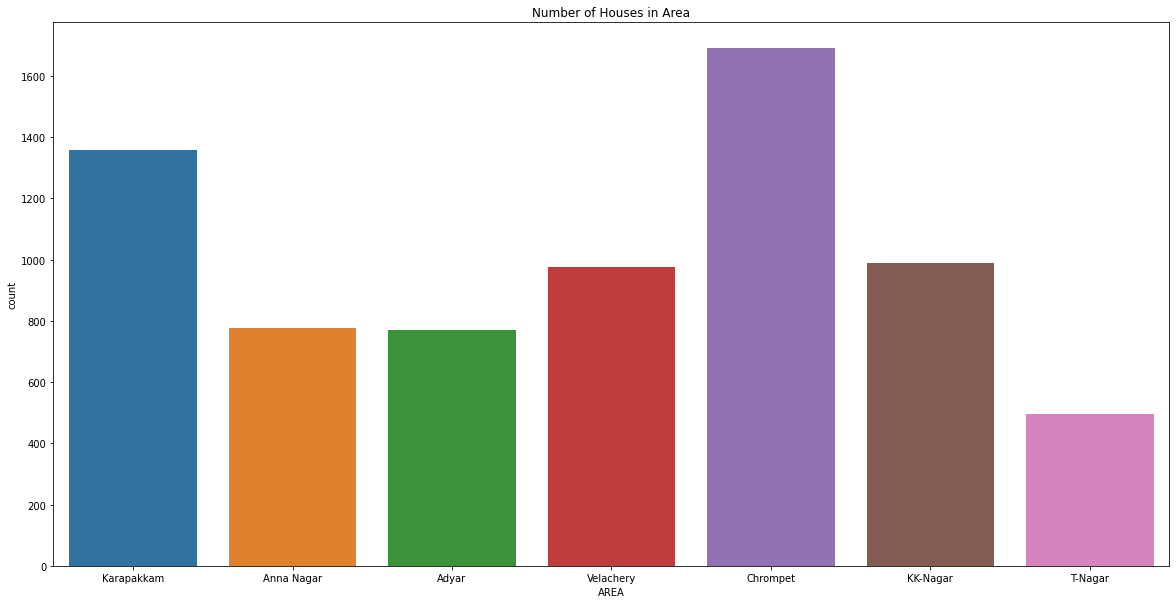

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x=df['AREA'])
plt.title("Number of Houses in Area")

Text(0.5, 1.0, 'Houses with Number of Bedrooms')

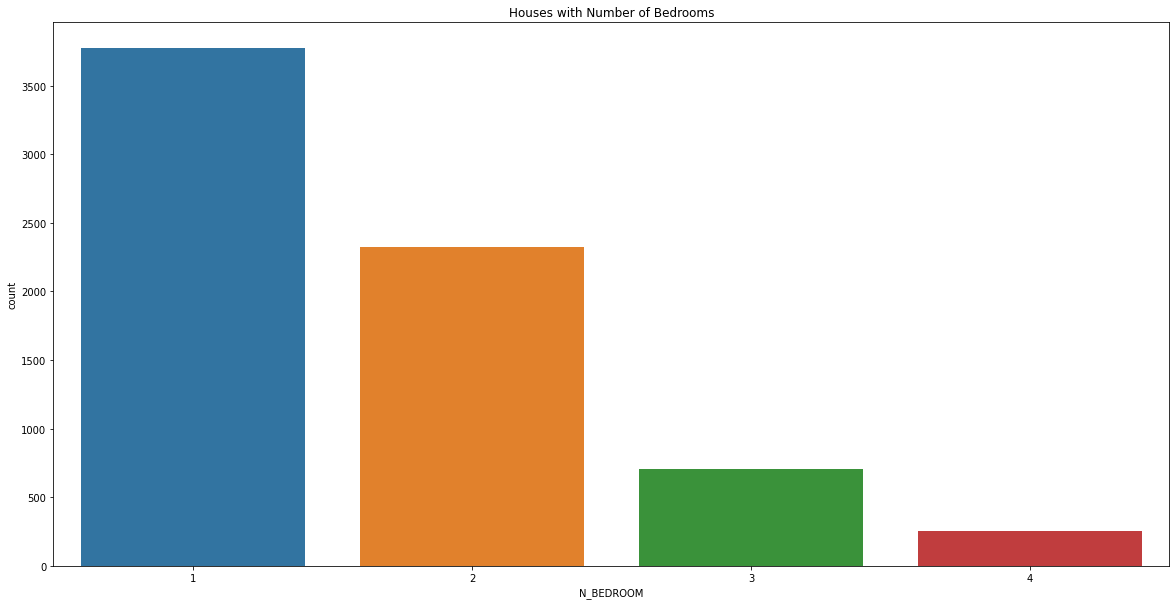

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(df['N_BEDROOM'])
plt.title("Houses with Number of Bedrooms")

In [ ]:
px.scatter(df,x='AREA',y='SALES_PRICE')

In [ ]:

px.scatter(df,x='INT_SQFT',y='SALES_PRICE',color='AREA')

In [ ]:
px.scatter(df,x='AGE_OF_HOUSE',y='SALES_PRICE',color='AREA')


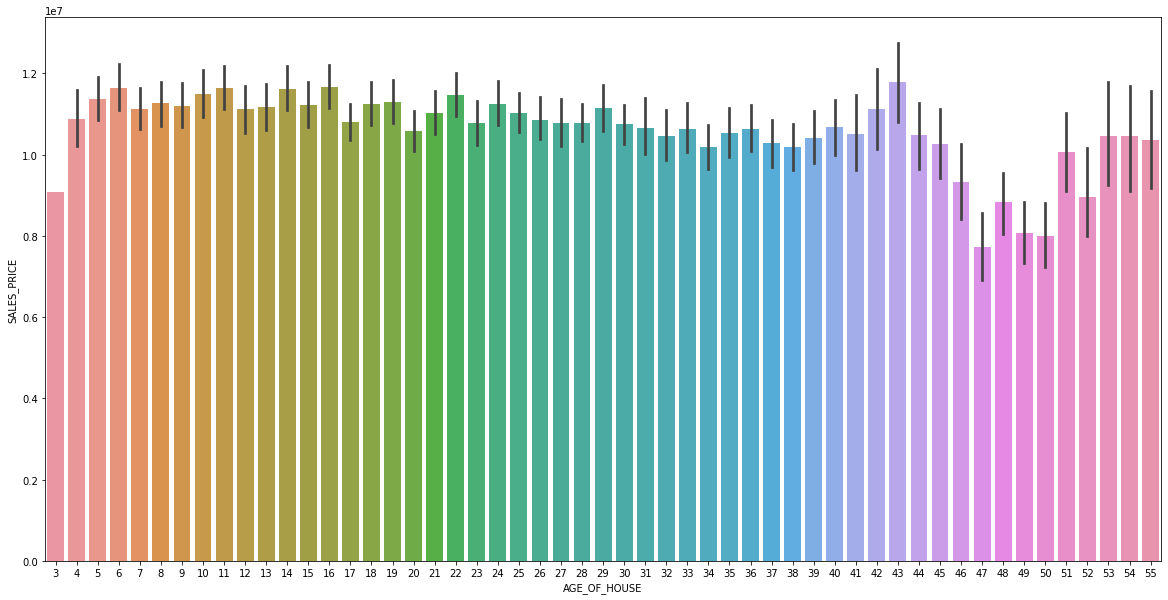

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(y="SALES_PRICE",x="AGE_OF_HOUSE",data=df)

# **Machine Learning Model and Prediction**

In [ ]:

pd.set_option('display.max_columns', None)
df.head(5)


,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,YEAR_SOLD,YEAR_BUILD,AGE_OF_HOUSE
0,P03210,Karapakkam,1004,2011-04-05,131,1,1,3,Abnormal,Yes,1967-05-15,Commercial,All Pub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,2011,1967,44
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,Abnormal,No,1995-12-22,Commercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,2006,1995,11
2,P01812,Adyar,909,2012-04-02,70,1,1,3,Abnormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,2012,1992,20
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,No Sewage,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,2010,1988,22
4,P06210,Karapakkam,1226,2009-05-10,84,1,1,3,Abnormal,Yes,1979-10-13,Others,All Pub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,2009,1979,30


In [ ]:
# Import LabelEncoder
from sklearn import preprocessing
import pandas as pd
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
 
df["AREA"]=le.fit_transform(df["AREA"])
df["PARK_FACIL"]=le.fit_transform(df["PARK_FACIL"])
df["BUILDTYPE"]=le.fit_transform(df["BUILDTYPE"])
df["UTILITY_AVAIL"]=le.fit_transform(df["UTILITY_AVAIL"])
df["STREET"]=le.fit_transform(df["STREET"])
df["SALE_COND"]=le.fit_transform(df["SALE_COND"])
df["SALE_COND"]=le.fit_transform(df["SALE_COND"])


df.head(5)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,YEAR_SOLD,YEAR_BUILD,AGE_OF_HOUSE
0,P03210,4,1004,2011-04-05,131,1,1,3,0,1,1967-05-15,0,0,2,A,4.0,3.9,4.9,4.330,380000,144400,7600000,2011,1967,44
1,P09411,1,1986,2006-12-19,26,2,1,5,0,0,1995-12-22,0,0,0,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,2006,1995,11
2,P01812,0,909,2012-04-02,70,1,1,3,0,1,1992-09-02,0,1,0,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,2012,1992,20
3,P05346,6,1855,2010-03-13,14,3,2,5,2,0,1988-03-18,2,2,2,I,4.7,3.9,3.6,4.010,356321,77042,9630290,2010,1988,22
4,P06210,4,1226,2009-05-10,84,1,1,3,0,1,1979-10-13,2,0,0,C,3.0,2.5,4.1,3.290,237000,74063,7406250,2009,1979,30


In [ ]:
df=df.drop(['PRT_ID','DATE_SALE','DATE_BUILD','MZZONE','REG_FEE','COMMIS'],axis=1)
df.head(5)



,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YEAR_SOLD,YEAR_BUILD,AGE_OF_HOUSE
0,4,1004,131,1,1,3,0,1,0,0,2,4.0,3.9,4.9,4.330,7600000,2011,1967,44
1,1,1986,26,2,1,5,0,0,0,0,0,4.9,4.2,2.5,3.765,21717770,2006,1995,11
2,0,909,70,1,1,3,0,1,0,1,0,4.1,3.8,2.2,3.090,13159200,2012,1992,20
3,6,1855,14,3,2,5,2,0,2,2,2,4.7,3.9,3.6,4.010,9630290,2010,1988,22
4,4,1226,84,1,1,3,0,1,2,0,0,3.0,2.5,4.1,3.290,7406250,2009,1979,30


# **Linear Regression**

In [ ]:
df1=df.copy()
df1


,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YEAR_SOLD,YEAR_BUILD,AGE_OF_HOUSE
0,4,1004,131,1,1,3,0,1,0,0,2,4.0,3.9,4.9,4.330,7600000,2011,1967,44
1,1,1986,26,2,1,5,0,0,0,0,0,4.9,4.2,2.5,3.765,21717770,2006,1995,11
2,0,909,70,1,1,3,0,1,0,1,0,4.1,3.8,2.2,3.090,13159200,2012,1992,20
3,6,1855,14,3,2,5,2,0,2,2,2,4.7,3.9,3.6,4.010,9630290,2010,1988,22
4,4,1226,84,1,1,3,0,1,2,0,0,3.0,2.5,4.1,3.290,7406250,2009,1979,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,4,598,51,1,1,2,1,0,2,1,1,3.0,2.2,2.4,2.520,5353000,2011,1962,49
7105,6,1897,52,3,2,5,2,1,2,2,1,3.6,4.5,3.3,3.920,10818480,2004,1995,9
7106,6,1614,152,2,1,4,3,0,1,2,0,4.3,4.2,2.9,3.840,8351410,2006,1978,28
7107,4,787,40,1,1,2,4,1,0,1,2,4.6,3.8,4.1,4.160,8507000,2009,1977,32


In [ ]:
x=df1[['AREA','INT_SQFT','DIST_MAINROAD','N_BEDROOM','N_ROOM','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','AGE_OF_HOUSE']].values
y=df1['SALES_PRICE'].values


In [ ]:
from sklearn.model_selection import train_test_split   
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([ 9262919.57860053, 10262256.6479607 , 12570230.64249015, ...,
        8260958.32467605, 11575822.71595572, 11044181.04928456])

In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df1.head(5)

,Actual,Predicted
0,7778900,9.262920e+06
1,7693965,1.026226e+07
2,12560000,1.257023e+07
3,12244540,1.560010e+07
4,13277730,1.100398e+07


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean Absolute Error: 1681998.492910937
Mean Squared Error: 4239668440596.523
Root Mean Squared Error: 1296.9188459232662


In [ ]:
score=model.score(x_test,y_test)
print(score)
print(score * 100,"%")

0.6971181383052206
69.71181383052206 %


In [ ]:
model.predict([[1,900,25,2,4,1,2,0,2,15]])




array([8036307.76663074])

# **SVM**

In [ ]:
df2=df.copy()
df2

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YEAR_SOLD,YEAR_BUILD,AGE_OF_HOUSE
0,4,1004,131,1,1,3,0,1,0,0,2,4.0,3.9,4.9,4.330,7600000,2011,1967,44
1,1,1986,26,2,1,5,0,0,0,0,0,4.9,4.2,2.5,3.765,21717770,2006,1995,11
2,0,909,70,1,1,3,0,1,0,1,0,4.1,3.8,2.2,3.090,13159200,2012,1992,20
3,6,1855,14,3,2,5,2,0,2,2,2,4.7,3.9,3.6,4.010,9630290,2010,1988,22
4,4,1226,84,1,1,3,0,1,2,0,0,3.0,2.5,4.1,3.290,7406250,2009,1979,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,4,598,51,1,1,2,1,0,2,1,1,3.0,2.2,2.4,2.520,5353000,2011,1962,49
7105,6,1897,52,3,2,5,2,1,2,2,1,3.6,4.5,3.3,3.920,10818480,2004,1995,9
7106,6,1614,152,2,1,4,3,0,1,2,0,4.3,4.2,2.9,3.840,8351410,2006,1978,28
7107,4,787,40,1,1,2,4,1,0,1,2,4.6,3.8,4.1,4.160,8507000,2009,1977,32


In [ ]:
x=df2[['AREA','INT_SQFT','DIST_MAINROAD','N_BEDROOM','N_ROOM','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','AGE_OF_HOUSE']].values
y=df2['SALES_PRICE'].values

In [ ]:
#Split Dataset into Train and Test Set

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=0)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (5644, 10) (5644,)
Test set: (1412, 10) (1412,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict 
model = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
model


KNeighborsClassifier(n_neighbors=4)

In [ ]:
#Model Score

score=model.score(x_train,y_train)
print(score)
print(score * 100,"%")

0.2523033309709426
25.23033309709426 %


In [ ]:
model.predict([[1,900,25,2,4,1,2,0,2,15]])

array([4663000])

# **Model Scores**

In [ ]:
df3=df.copy()
df3

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YEAR_SOLD,YEAR_BUILD,AGE_OF_HOUSE
0,4,1004,131,1,1,3,0,1,0,0,2,4.0,3.9,4.9,4.330,7600000,2011,1967,44
1,1,1986,26,2,1,5,0,0,0,0,0,4.9,4.2,2.5,3.765,21717770,2006,1995,11
2,0,909,70,1,1,3,0,1,0,1,0,4.1,3.8,2.2,3.090,13159200,2012,1992,20
3,6,1855,14,3,2,5,2,0,2,2,2,4.7,3.9,3.6,4.010,9630290,2010,1988,22
4,4,1226,84,1,1,3,0,1,2,0,0,3.0,2.5,4.1,3.290,7406250,2009,1979,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,4,598,51,1,1,2,1,0,2,1,1,3.0,2.2,2.4,2.520,5353000,2011,1962,49
7105,6,1897,52,3,2,5,2,1,2,2,1,3.6,4.5,3.3,3.920,10818480,2004,1995,9
7106,6,1614,152,2,1,4,3,0,1,2,0,4.3,4.2,2.9,3.840,8351410,2006,1978,28
7107,4,787,40,1,1,2,4,1,0,1,2,4.6,3.8,4.1,4.160,8507000,2009,1977,32


In [ ]:
from sklearn.model_selection import train_test_split


x=df3.drop(columns=["SALES_PRICE"])
y=df3["SALES_PRICE"]
print(x.shape)
print(y.shape)

x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

(7056, 18)
(7056,)


In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

model = LinearRegression()
bagging_reg_lin= BaggingRegressor(base_estimator=model, n_estimators=1500, random_state=42)
bagging_reg_lin.fit(x_train, y_train)
bagging_reg_lin.score(x_test,y_test)

0.740577782967358

In [ ]:
from sklearn.tree import DecisionTreeRegressor
#fitting the model
decisiontree = DecisionTreeRegressor()
decisiontree.fit(x_train,y_train)

#predicting 
decisiontree_score = decisiontree.score(x_test,y_test)*100
print("Decision Tree score is",decisiontree_score)

Decision Tree score is 88.58328727563544


In [ ]:
from sklearn.ensemble import RandomForestRegressor
randomforest = RandomForestRegressor(max_depth=16,n_estimators=180,random_state=15)
randomforest.fit(x_train,y_train)

ypred = randomforest.predict(x_test)
randomforestscore = randomforest.score(x_test,y_test)*100
print("Random Forest Square is  :",randomforestscore)

Random Forest Square is  : 93.98746692842195


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

ada_boost_reg = AdaBoostRegressor(n_estimators=30)
ada_boost_reg.fit(x_train, y_train)
ada_boost_reg.score(x_test,y_test)

0.8613569018220272

In [ ]:
#Feature importance
feature_scores = pd.Series(randomforest.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_scores=feature_scores*100
feature_scores

INT_SQFT         42.453260
BUILDTYPE        31.344445
AREA             13.602181
N_BEDROOM         3.839420
PARK_FACIL        1.589552
N_BATHROOM        1.202818
STREET            0.902286
DIST_MAINROAD     0.621508
YEAR_BUILD        0.577110
QS_OVERALL        0.536136
QS_ROOMS          0.522500
AGE_OF_HOUSE      0.518191
QS_BATHROOM       0.515307
QS_BEDROOM        0.501361
N_ROOM            0.414540
SALE_COND         0.361226
YEAR_SOLD         0.328824
UTILITY_AVAIL     0.169336
dtype: float64

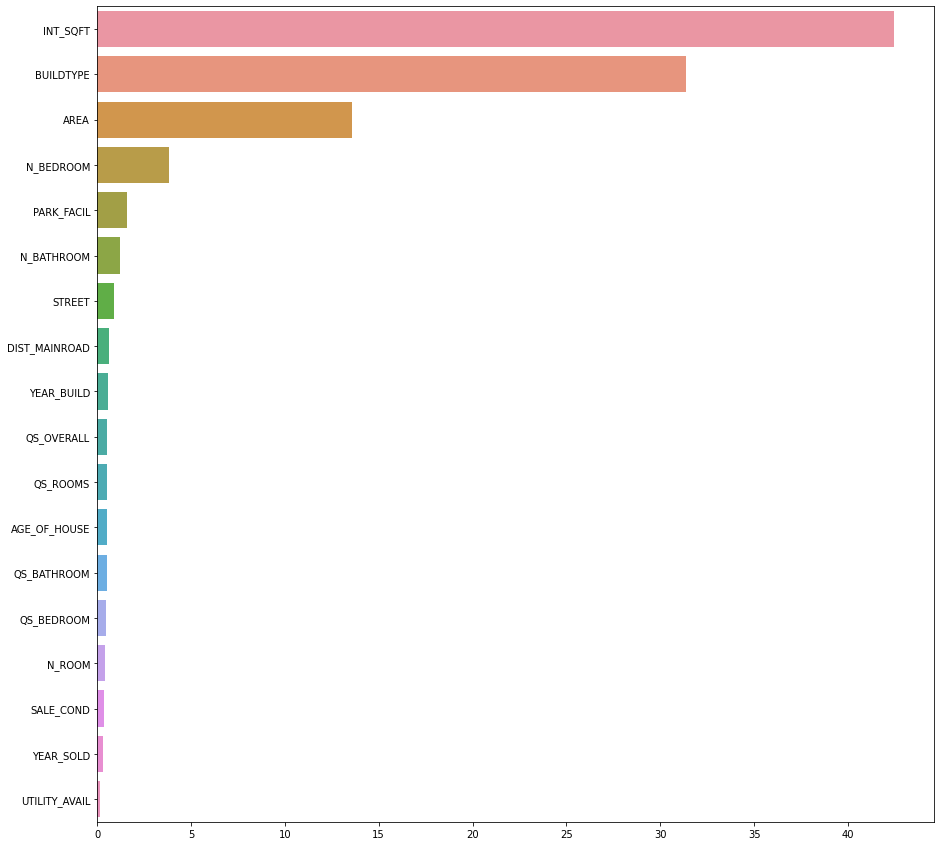

In [ ]:
plt.figure(figsize=(15,15))
sns.barplot(x=feature_scores,y=feature_scores.index)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x=df3.drop(columns=["SALES_PRICE","UTILITY_AVAIL","QS_BEDROOM","DIST_MAINROAD","SALE_COND","QS_ROOMS","QS_BATHROOM","QS_OVERALL",'YEAR_SOLD','YEAR_BUILD'])
y=df3["SALES_PRICE"]
print(x.shape)
print(y.shape)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

(7056, 9)
(7056,)


In [ ]:
randomforest_1 = RandomForestRegressor(n_estimators=100, random_state=0)
randomforest_1.fit(x_train, y_train)
y_pred = randomforest_1.predict(x_test)
randomforest_1.score(x_test,y_test)

0.937208156982503

Random Forest Regression is the best model for this data

# **Prediction**

In [ ]:
x.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'BUILDTYPE', 'STREET', 'AGE_OF_HOUSE'],
      dtype='object')

In [ ]:
randomforest_1.predict([[1,1500,2,1,3,1,1,1,20]])


array([9567037.05])

In [ ]:
#Currency Conversion
from babel.numbers import format_currency

value=randomforest_1.predict([[1,1500,2,1,3,1,1,1,20]])
low=int(value-(value*0.02))
low = format_currency(low, 'INR', locale='en_IN')


high=int(value+(value*0.02))
high = format_currency(high, 'INR', locale='en_IN')
print('Estimated value is:',low , 'to', high)

Estimated value is: ₹93,75,696.00 to ₹97,58,377.00
